In [1]:
import napari
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree
from cryofib.napari_utils import napari_add_group
from cryofib.data_loaders import load_F107_A1_pred

## View n5 datasets

In [2]:
data_dir = Path("/g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107")
em_n5_path = data_dir / "F107_A1_em.n5"

f_em = z5py.File(em_n5_path, "r")

In [3]:
print_key_tree(f_em)

Key structure of z5 file /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
raw
segmentation
segmentation/nuclei
segmentation/edoardo
segmentation/edoardo/boundaries
segmentation/edoardo/foreground
segmentation/ground_truth_channels
segmentation/ground_truth
raw_norm


## Read volumes

In [4]:
roi = np.s_[:]
em = read_volume(f_em, "raw", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume raw from /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
Read volume with shape (1350, 1506, 1647), data type uint8


In [ ]:
plt.hist(em.flatten(), bins=100)

## Open raw in napari

In [5]:
v = napari.Viewer()

In [6]:
ds = f_em["raw"]
v.add_image(em, name="raw")

<Image layer 'raw' at 0x7fb77f53e530>

In [7]:
em_norm = read_volume(f_em, "raw_norm", roi)
v.add_image(em_norm, name="raw_norm")

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume raw_norm from /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
Read volume with shape (1350, 1506, 1647), data type float32


<Image layer 'raw_norm' at 0x7fb990486ec0>

(array([1.01377645e+09, 7.12060900e+06, 3.29930700e+06, 4.02483500e+06,
        2.31541400e+06, 2.13576300e+06, 2.99859800e+06, 2.88559700e+06,
        1.93399900e+06, 3.02046500e+06, 2.11417600e+06, 2.19022900e+06,
        3.42923500e+06, 2.39654700e+06, 3.81916500e+06, 4.20351500e+06,
        3.11479000e+06, 3.45302300e+06, 6.02009700e+06, 7.33537500e+06,
        5.80362900e+06, 6.65173500e+06, 1.16260140e+07, 8.94282700e+06,
        1.59217060e+07, 1.96745600e+07, 1.44457150e+07, 1.41931600e+07,
        1.89471570e+07, 1.09783590e+07, 1.50568690e+07, 1.45694410e+07,
        9.87575400e+06, 1.02385150e+07, 1.64646160e+07, 1.19723600e+07,
        1.98456710e+07, 2.25393050e+07, 1.67386160e+07, 2.79753850e+07,
        2.08219980e+07, 2.27973710e+07, 3.84588240e+07, 2.88178940e+07,
        4.85259750e+07, 5.55791440e+07, 4.14221400e+07, 4.51296870e+07,
        7.49136850e+07, 5.48027210e+07, 8.92363980e+07, 9.68192180e+07,
        6.79104010e+07, 6.97804470e+07, 1.06378922e+08, 7.084541

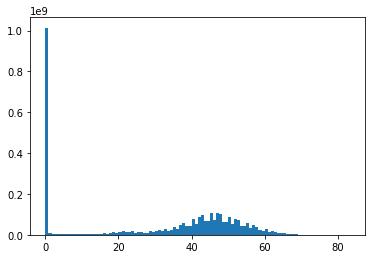

In [8]:
plt.hist(em.flatten(), bins=100)

### Open all predictions in a group

In [7]:
f_pred = load_F107_A1_pred()

In [8]:
print_key_tree(f_pred)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
predictions
predictions/full_masked_dice_s0_64x256x256_128x128x128
predictions/full_masked_dice_s0_64x256x256_128x128x128/fg
predictions/full_masked_dice_s0_64x256x256_128x128x128/extra
predictions/full_masked_dice_s0_64x256x256_128x128x128/bg
predictions/full_masked_dice_s0_64x256x256_128x128x128/boundaries
predictions/full_masked_dice_s0_64x256x256
predictions/full_masked_dice_s0_64x256x256/boundaries
predictions/full_masked_dice_s0_64x256x256/fg
predictions/full_masked_dice_s0_64x256x256/extra
predictions/full_masked_dice_s0_64x256x256/bg


In [9]:
roi = np.s_[:]
boundaries = read_volume(f_pred, "predictions/full_masked_dice_s0_64x256x256/boundaries", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/full_masked_dice_s0_64x256x256/boundaries from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float32


In [10]:
v.add_image(boundaries, name="boundaries")

<Image layer 'boundaries' at 0x7fe6b8134850>

In [11]:
extra = read_volume(f_pred, "predictions/full_masked_dice_s0_64x256x256/extra", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/full_masked_dice_s0_64x256x256/extra from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float32


In [12]:
v.add_image(extra, name="extra")

<Image layer 'extra' at 0x7fe6b81b8880>

In [13]:
bg = read_volume(f_pred, "predictions/full_masked_dice_s0_64x256x256/bg", roi)
v.add_image(bg, name="bg")

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/full_masked_dice_s0_64x256x256/bg from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float32


<Image layer 'bg' at 0x7fe6b0103cd0>

In [14]:
fg = read_volume(f_pred, "predictions/full_masked_dice_s0_64x256x256/fg", roi)
v.add_image(fg, name="fg")

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/full_masked_dice_s0_64x256x256/fg from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float32


<Image layer 'fg' at 0x7fe6b0124250>